#1. Quiz
> 붓꽃 데이터를 이용하여 최적화된 KNN 모델을 만드시오

#2. 데이터 확인

##2.1 데이터 읽기

In [1]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


##2.2 데이터 정보 확인

In [2]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# 붓꽃 품종의 이름
print("타깃의 이름 : {}".format(iris_dataset['target_names']))
# 각 특성을 설명하는 문자열 리스트
print("특성의 이름 : \n{}".format(iris_dataset['feature_names']))

타깃의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#3. 모델 만들기

##3.1 데이터 분류

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)


print("X_train 의 크기 : {}".format(X_train.shape))
print("y_train 의 크기 : {}".format(y_train.shape))
print("X_test 의 크기 : {}".format(X_test.shape))
print("y_test 의 크기 : {}".format(y_test.shape))

X_train 의 크기 : (112, 4)
y_train 의 크기 : (112,)
X_test 의 크기 : (38, 4)
y_test 의 크기 : (38,)


##3.2 모델 생성

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##3.3 모델 정확도 평가하기

In [6]:
print(clf.score(X_test, y_test))

0.9736842105263158


#4. 교차검증

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(clf, X=iris_dataset['data'], y=iris_dataset['target'], scoring='accuracy', cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


#5. 모델 튜닝하기

In [10]:
from sklearn.neighbors import KNeighborsClassifier
dt_clf = KNeighborsClassifier()

In [11]:
from sklearn.model_selection import GridSearchCV

def get_best_hyper_paramerter(n_neighbors_list):
  params =  {
    'n_neighbors' : n_neighbors_list,
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
  }

  grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
  grid_cv.fit(X_train, y_train)
  print('Best Score: ', grid_cv.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

In [12]:
# 10단위 리스트
n_neighbors_list =  range(1, 91, 10)

get_best_hyper_paramerter(n_neighbors_list)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score:  0.9731225296442687
Best Hyper Parameter:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [13]:
# 3단위 리스트
n_neighbors_list =  range(6, 16, 3)

get_best_hyper_paramerter(n_neighbors_list)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score:  0.9731225296442687
Best Hyper Parameter:  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}


In [14]:
# 1단위 리스트
n_neighbors_list =  range(9, 15, 1)

get_best_hyper_paramerter(n_neighbors_list)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Score:  0.9731225296442687
Best Hyper Parameter:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}


#6. 최적화 적용

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1, metric='manhattan', weights= 'uniform')

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.9736842105263158


In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,181 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [17]:
import matplotlib.pyplot as plt

plt.rcParams['font.family']='NanumGothic'

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.

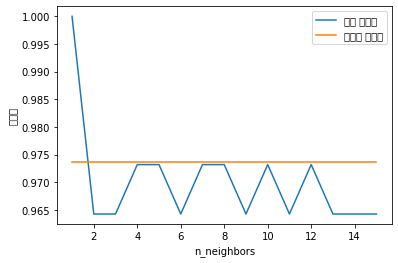

In [18]:
X_train, X_test, y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fit 적용 시 y_train 정보는 1차원 배열로 전달되어야 한다.
    # 하지만 y_train은 2차원 배열로 되어 있어 reshape를 처리했다.
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()